In [111]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score

### Read the data

In [112]:
data = pd.read_csv("rainfall in india 1901-2015.csv")
data.head(20)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.200000,87.100000,29.200000,2.300000,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.300000,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.000001,159.800000,12.200000,0.000001,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.800000,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.700000,144.000000,0.000001,1.000000,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.700000,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.400000,14.700000,0.000001,202.400000,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.100000,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.300000,0.000001,3.300000,26.900000,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.300000,309.7,1624.9,630.8
5,ANDAMAN & NICOBAR ISLANDS,1906,36.600000,0.000001,0.000001,0.000001,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.600000,556.1,1465.8,475.9
6,ANDAMAN & NICOBAR ISLANDS,1907,110.700000,0.000001,113.300000,21.600000,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.700000,751.2,1327.1,1158.9
7,ANDAMAN & NICOBAR ISLANDS,1908,20.900000,85.100000,0.000001,29.000000,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.000000,591.0,2303.7,575.7
8,ANDAMAN & NICOBAR ISLANDS,1910,26.600000,22.700000,206.300000,89.300000,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.300000,520.1,1701.0,629.0
9,ANDAMAN & NICOBAR ISLANDS,1911,0.000001,8.400000,0.000001,122.500000,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.400000,449.8,1553.6,675.4


## Data Preparation

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4117 non-null   object 
 1   YEAR         4117 non-null   int64  
 2   JAN          4117 non-null   float64
 3   FEB          4117 non-null   float64
 4   MAR          4117 non-null   float64
 5   APR          4117 non-null   float64
 6   MAY          4117 non-null   float64
 7   JUN          4117 non-null   float64
 8   JUL          4117 non-null   float64
 9   AUG          4117 non-null   float64
 10  SEP          4117 non-null   float64
 11  OCT          4117 non-null   float64
 12  NOV          4117 non-null   float64
 13  DEC          4117 non-null   float64
 14  ANNUAL       4117 non-null   float64
 15  Jan-Feb      4117 non-null   float64
 16  Mar-May      4117 non-null   float64
 17  Jun-Sep      4117 non-null   float64
 18  Oct-Dec      4117 non-null   float64
dtypes: flo

In [114]:
data.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [115]:
data.duplicated().sum()

0

In [116]:
data['SUBDIVISION'].value_counts()


SUBDIVISION
EAST RAJASTHAN                        116
WEST MADHYA PRADESH                   115
COASTAL KARNATAKA                     115
TAMIL NADU                            115
RAYALSEEMA                            115
TELANGANA                             115
COASTAL ANDHRA PRADESH                115
CHHATTISGARH                          115
VIDARBHA                              115
MATATHWADA                            115
MADHYA MAHARASHTRA                    115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
GUJARAT REGION                        115
EAST MADHYA PRADESH                   115
KERALA                                115
WEST RAJASTHAN                        115
SOUTH INTERIOR KARNATAKA              115
JAMMU & KASHMIR                       115
HIMACHAL PRADESH                      115
PUNJAB                                115
HARYANA DELHI & CHANDIGARH            115
UTTARAKHAND                           115
WEST UTTAR PRADESH    

In [117]:
data.mean(numeric_only=True) 


YEAR       1958.234637
JAN          18.941195
FEB          21.786568
MAR          27.314234
APR          43.076828
MAY          85.664149
JUN         229.904615
JUL         346.587005
AUG         289.970002
SEP         197.059558
OCT          95.322638
NOV          39.750279
DEC          18.820185
ANNUAL     1401.913141
Jan-Feb      40.681419
Mar-May     155.528419
Jun-Sep    1062.030095
Oct-Dec     153.577435
dtype: float64

In [118]:
data = data.fillna(data.mean(numeric_only=True)) 

In [119]:
data.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.200000,87.100000,29.200000,2.300000,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.000001,159.800000,12.200000,0.000001,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.700000,144.000000,0.000001,1.000000,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.400000,14.700000,0.000001,202.400000,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.300000,0.000001,3.300000,26.900000,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,ANDAMAN & NICOBAR ISLANDS,1906,36.600000,0.000001,0.000001,0.000001,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,ANDAMAN & NICOBAR ISLANDS,1907,110.700000,0.000001,113.300000,21.600000,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,ANDAMAN & NICOBAR ISLANDS,1908,20.900000,85.100000,0.000001,29.000000,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,ANDAMAN & NICOBAR ISLANDS,1910,26.600000,22.700000,206.300000,89.300000,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,ANDAMAN & NICOBAR ISLANDS,1911,0.000001,8.400000,0.000001,122.500000,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


In [120]:
data.isnull().any()

SUBDIVISION    False
YEAR           False
JAN            False
FEB            False
MAR            False
APR            False
MAY            False
JUN            False
JUL            False
AUG            False
SEP            False
OCT            False
NOV            False
DEC            False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
dtype: bool

In [121]:
data.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       1943, 1944, 1945, 1948, 1909, 2024], dtype=int64)

In [122]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000
mean,1958.234637,18.941195,21.786568,27.314234,43.076828,85.664149,229.904615,346.587005,289.970002,197.059558,95.322638,39.750279,18.820185,1401.913141,40.681419,155.528419,1062.030095,153.577435
std,33.152727,33.570487,35.897329,46.932217,67.805567,123.202631,234.698748,269.667739,188.873874,135.505796,99.510186,68.618705,42.324160,907.862363,59.279899,201.214853,708.769971,166.898949
min,1901.000000,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.000000,174.800000,155.700000,100.400000,14.500000,0.600000,0.100000,794.700000,4.100000,23.800000,571.900000,33.500000
50%,1958.000000,6.000000,6.700000,7.800000,15.600000,36.400000,138.600000,284.400000,259.200000,173.600000,64.900000,9.500000,3.000000,1118.600000,19.100000,74.400000,880.200000,97.300000
75%,1987.000000,22.200000,26.800000,31.200000,49.800000,96.700000,304.900000,418.200000,377.700000,265.700000,148.300000,45.800000,17.500000,1634.900000,50.300000,196.900000,1287.500000,212.500000
max,2024.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [123]:
data.shape

(4117, 19)

## Data Visualization

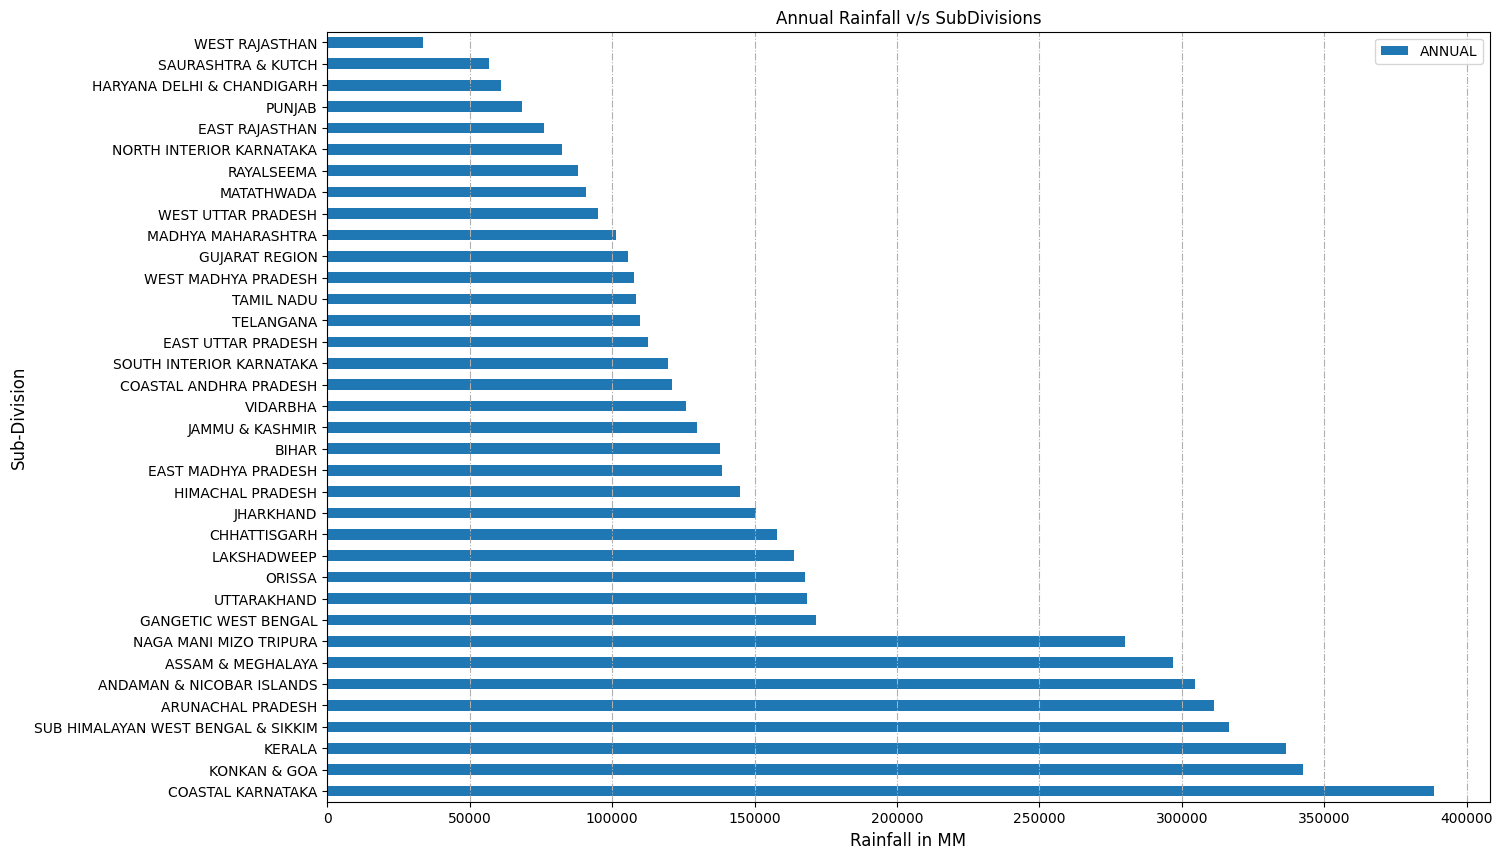

In [124]:
data[["SUBDIVISION","ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(by='ANNUAL',ascending=False).plot(kind='barh',stacked=True,figsize=(15,10))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.title("Annual Rainfall v/s SubDivisions")
plt.grid(axis="x",linestyle="-.")
plt.show()

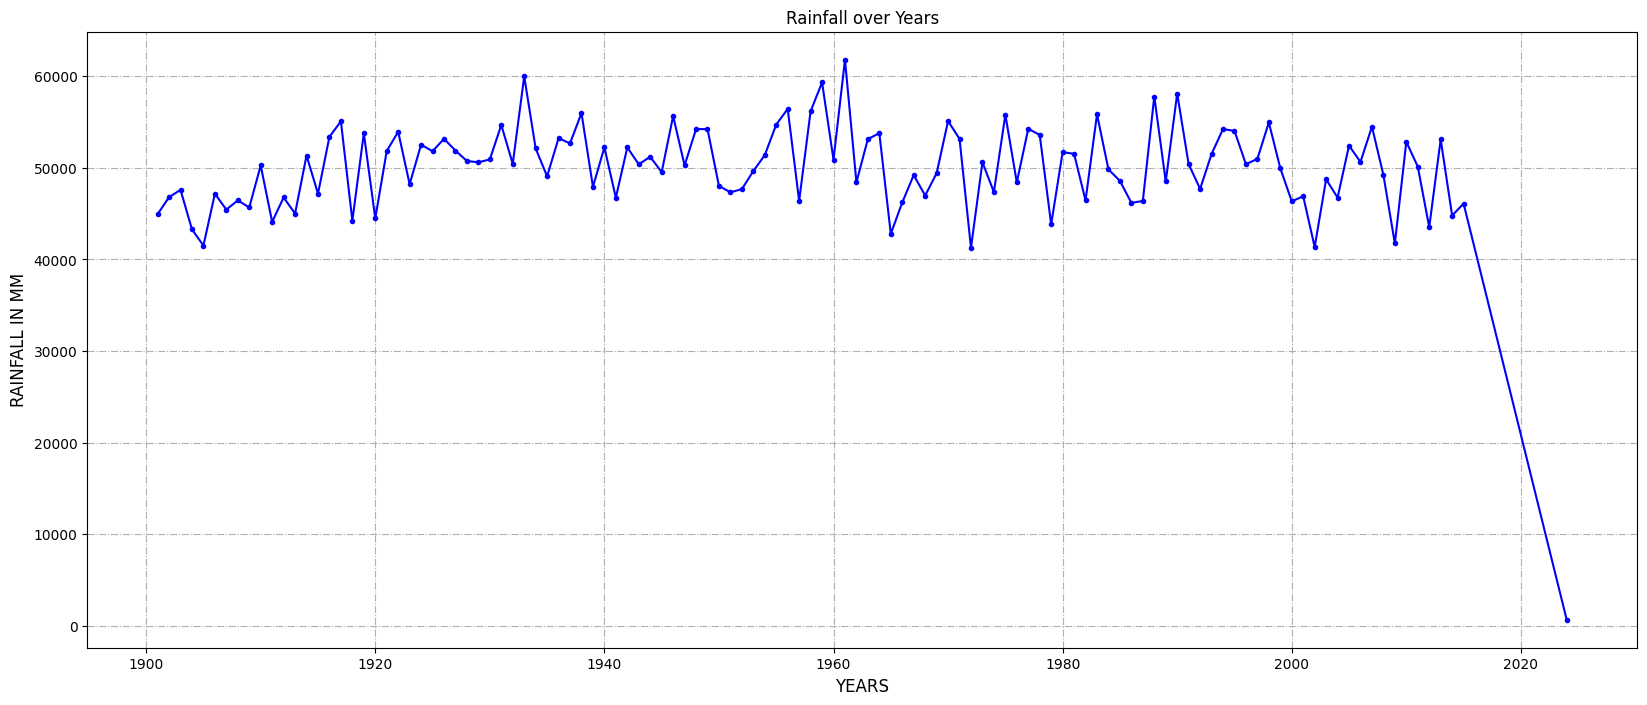

In [125]:
plt.figure(figsize=(20,8))
data.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="b",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years")
plt.show()

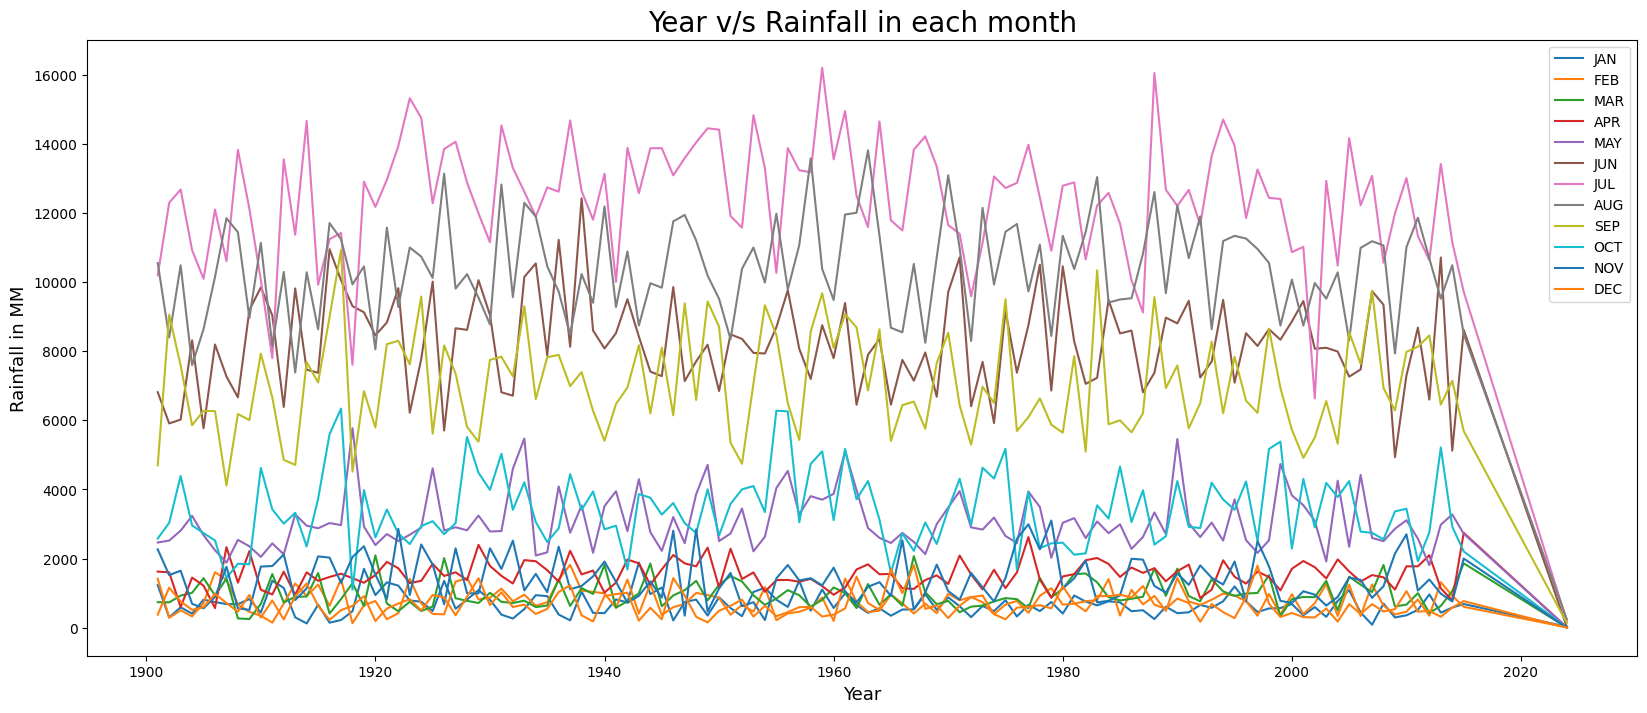

In [126]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP',
      'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(kind="line",figsize=(20,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.title("Year v/s Rainfall in each month",size=20)
plt.show()

`Above plot shows the Year vs Rainfall in each month,
 we observe that:-
 1)July has heavy rainfall 
 2)Feb has least rainfall `

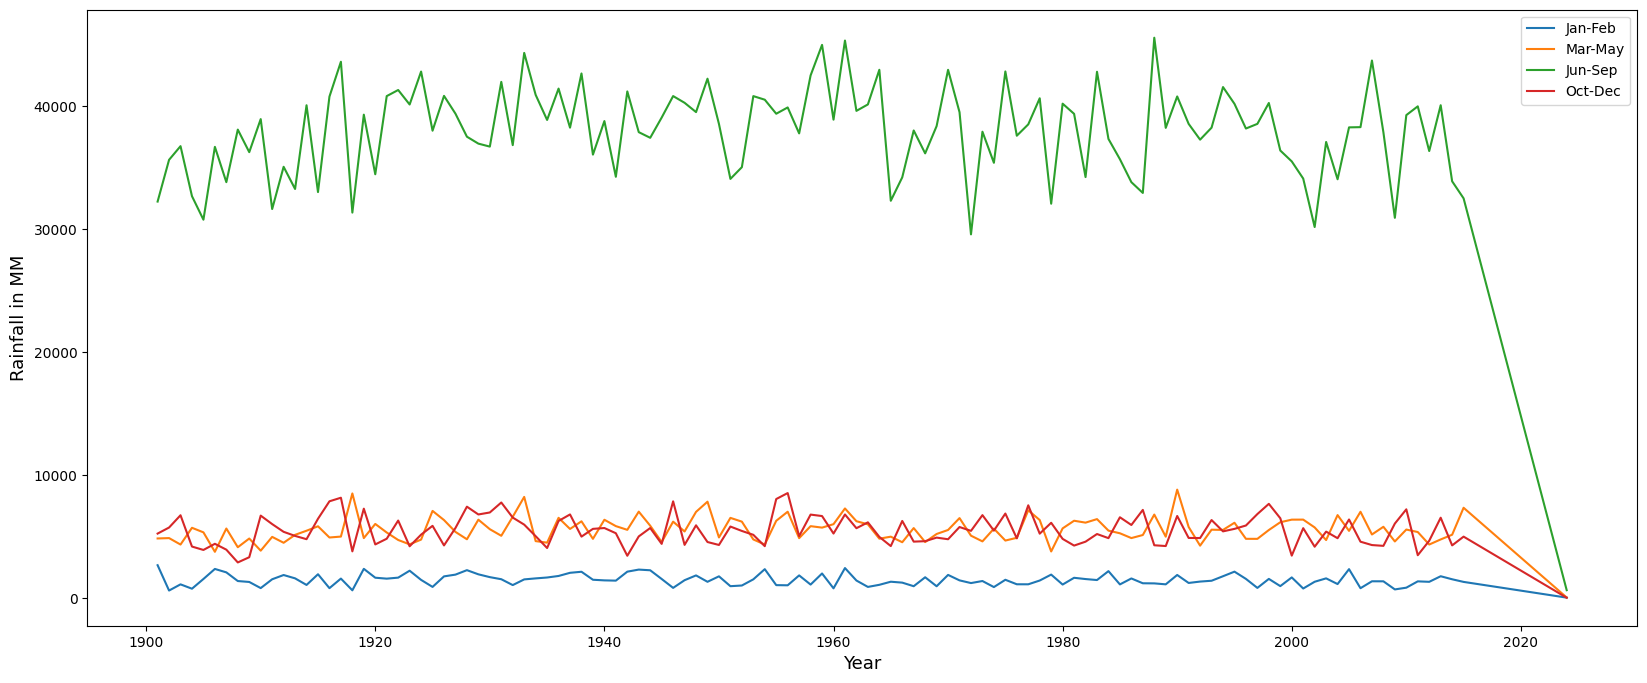

In [127]:
data[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(20,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.show()

`From Above Graph we observe that :-
 1)combined jun,july,august,sept recieves huge rainfall
 2)combined jan,feb recieves least Rainfall`

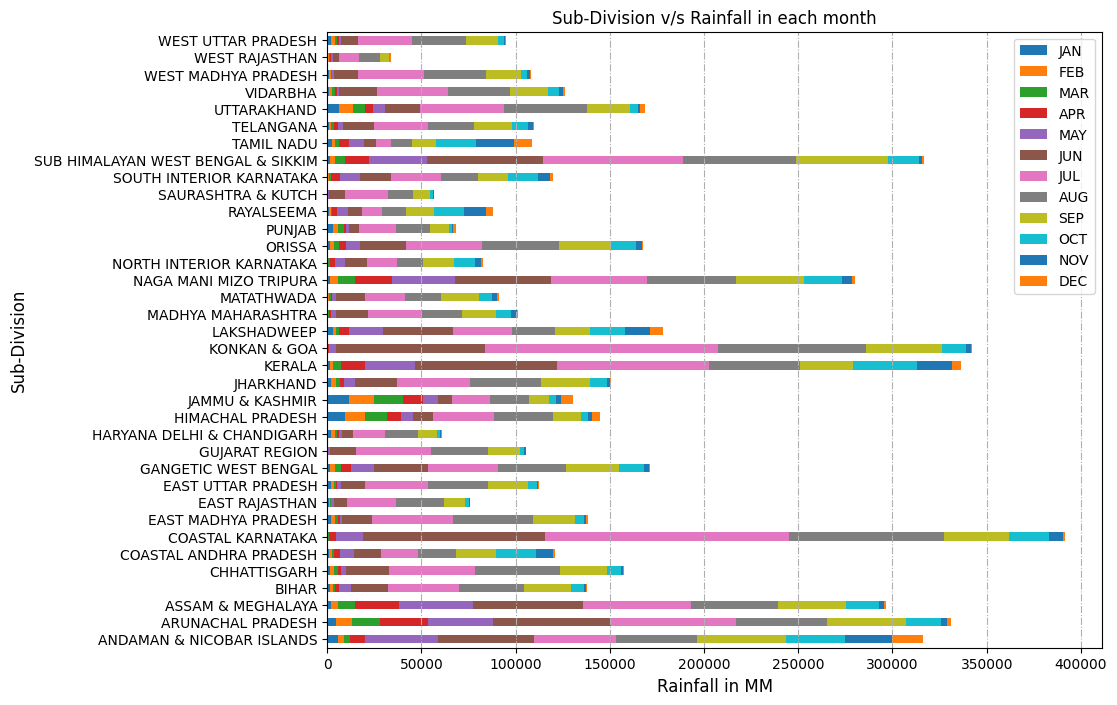

In [128]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(10,8))
plt.title("Sub-Division v/s Rainfall in each month")
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

## Modelling 

In [129]:
data["SUBDIVISION"].nunique()

36

In [130]:
group = data.groupby('SUBDIVISION')[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
data = group.get_group('EAST RAJASTHAN')
data.head()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1932,1901,21.6,8.9,2.900000,0.7,5.0,15.0,164.8,175.6,7.5,9.800000,0.000001,0.800000
1933,1902,4.1,0.7,0.000001,1.8,9.9,34.6,247.6,116.7,145.6,14.400000,0.000001,2.800000
1934,1903,1.9,0.7,1.300000,0.1,12.9,15.6,238.2,229.1,168.5,17.800000,0.000001,0.000001
1935,1904,4.3,5.5,21.700000,0.2,27.5,49.9,289.7,223.5,50.2,1.500000,5.800000,14.700000
1936,1905,4.1,8.8,3.200000,1.6,2.0,14.4,130.5,30.9,83.8,0.000001,0.000001,0.600000


In [131]:
df=data.melt(['YEAR']).reset_index()
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,21.6
1,1,1902,JAN,4.1
2,2,1903,JAN,1.9
3,3,1904,JAN,4.3
4,4,1905,JAN,4.1


In [132]:
df= df[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,21.6
116,116,1901,FEB,8.9
232,232,1901,MAR,2.9
348,348,1901,APR,0.7
464,464,1901,MAY,5.0


In [133]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2024], dtype=int64)

In [134]:
df.columns=['Index','Year','Month','Avg_Rainfall']

In [135]:
df.head()

,Index,Year,Month,Avg_Rainfall
0,0,1901,JAN,21.6
116,116,1901,FEB,8.9
232,232,1901,MAR,2.9
348,348,1901,APR,0.7
464,464,1901,MAY,5.0


In [136]:
Month_map={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(Month_map)
df.head(12)

,Index,Year,Month,Avg_Rainfall
0,0,1901,1,21.600000
116,116,1901,2,8.900000
232,232,1901,3,2.900000
348,348,1901,4,0.700000
464,464,1901,5,5.000000
580,580,1901,6,15.000000
696,696,1901,7,164.800000
812,812,1901,8,175.600000
928,928,1901,9,7.500000
1044,1044,1901,10,9.800000


In [137]:
df.drop(columns="Index",inplace=True)

In [138]:
df.head(2)

,Year,Month,Avg_Rainfall
0,1901,1,21.6
116,1901,2,8.9


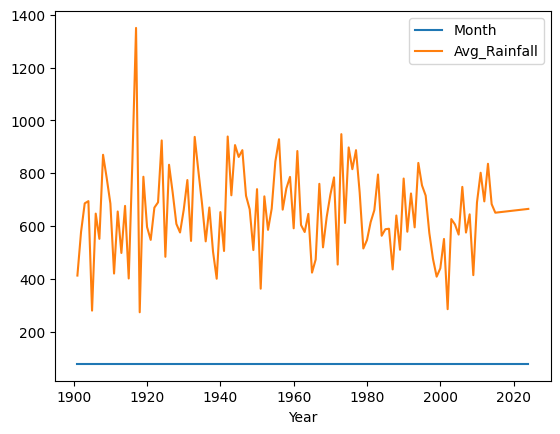

In [139]:
df.groupby("Year").sum().plot()
plt.show()

In [140]:
X=np.asanyarray(df[['Year','Month']]).astype('int')
y=np.asanyarray(df['Avg_Rainfall']).astype('int')
print(X.shape)
print(y.shape)

(1392, 2)
(1392,)


In [141]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Linear Regression Model

In [142]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [143]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [144]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 68.0417071632025
MSE: 8918.711952939499
RMSE: 94.43893240046448

-------Train Data--------
MAE: 63.46798933404101
MSE: 7665.116918212803
RMSE: 87.55065344252323

-----Training Accuracy-------
2.8000000000000003
-----Testing Accuracy--------
2.7


In [145]:
score1 = (r2_score(y_test, y_test_predict)*100)
score1

2.7131494255015376

### Svm Model

In [146]:
from sklearn import preprocessing
from sklearn import svm

svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train) 

SVC()

In [147]:
y_test_predict = svm_regr.predict(X_test)
y_train_predict = svm_regr.predict(X_train)

In [148]:
from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))


print("\n-----Training Accuracy-------")
print(round(svm_regr.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(svm_regr.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 58.69138755980861
MSE: 12612.117224880383
RMSE: 112.3036830423668

-------Train Data--------
MAE: 52.29158110882957
MSE: 10623.422997946613
RMSE: 103.06999077300149

-----Training Accuracy-------
25.5
-----Testing Accuracy--------
28.9


In [149]:
score2 = (r2_score(y_test, y_test_predict)*100)
score2

-37.575153268695274

### xgboost

In [150]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [151]:
y_train_predict=xgb.predict(X_train)
y_test_predict=xgb.predict(X_test)

In [152]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("-----------Training Accuracy------------")
print(round(xgb.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(xgb.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 32.085994513839054
MSE: 3334.531147191921
RMSE: 57.74539935953271

-------Train Data--------
MAE: 7.9733544758064925
MSE: 203.22193724444975
RMSE: 14.255593191602015
-----------Training Accuracy------------
97.39999999999999
-----------Testing Accuracy------------
63.6


In [153]:
score3 = (r2_score(y_test, y_test_predict)*100)
score3

63.62635824941616

### Random Forest Model

In [154]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [155]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [156]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 29.617961219704224
MSE: 2561.5064025683446
RMSE: 50.61132682086436

-------Train Data--------
MAE: 21.313417151186755
MSE: 1456.297999434067
RMSE: 38.16147271049778
-----------Training Accuracy------------
81.5
-----------Testing Accuracy------------
72.1


In [157]:
score4 = (r2_score(y_test, y_test_predict)*100)
score4

72.05864569377039

In [158]:
predicted = random_forest_model.predict([[2023,9]])

In [159]:
predicted

array([107.56059908])

# Ensemble Stacking

### Hybrid Model 1

The stacked model with meta learner = XG Boost and the weak learners = Linear Regression, Random Forest and SVM 

In [160]:
from mlxtend.regressor import StackingCVRegressor

stack = StackingCVRegressor(regressors=(LR, random_forest_model, svm_regr),
                            meta_regressor=xgb, 
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack.fit(X_train, y_train)

y_train_predict=stack.predict(X_train)
y_test_predict=stack.predict(X_test)

print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("-----------Training Accuracy------------")
print(round(stack.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack.score(X_test,y_test),3)*100)

score5 = (r2_score(y_test, y_test_predict)*100)
score5

-------Test Data--------
MAE: 29.03413838661904
MSE: 2596.270691240525
RMSE: 50.95361313234347

-------Train Data--------
MAE: 23.017128500804397
MSE: 2085.5756444929425
RMSE: 45.668103140955424
-----------Training Accuracy------------
73.6
-----------Testing Accuracy------------
71.7


71.67943082785419

### Hybrid Model 2

The stacked model with meta learner = random forest  and the weak learners = Linear Regression, Random Forest and Xg Boost

In [161]:
stack4 = StackingCVRegressor(regressors=( random_forest_model,xgb,LR),
                            meta_regressor=random_forest_model, 
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)
stack4.fit(X_train, y_train)

y_train_predict=stack4.predict(X_train)
y_test_predict=stack4.predict(X_test)
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
print("-----------Training Accuracy------------")
print(round(stack4.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack4.score(X_test,y_test),3)*100)

score6 = (r2_score(y_test, y_test_predict)*100)
score6



-------Test Data--------
MAE: 27.176793876274797
MSE: 2298.1096728466537
RMSE: 47.93860315911024

-------Train Data--------
MAE: 23.305305330748656
MSE: 1991.938116390099
RMSE: 44.63113393574152
-----------Training Accuracy------------
74.8
-----------Testing Accuracy------------
74.9


74.93182271994398

In [162]:
predicted = stack4.predict([[2023,9]])
predicted

array([100.49484808])

### Hybrid Model 3

In [163]:
stack5 = StackingCVRegressor(regressors=( LR,xgb,svm_regr),
                            meta_regressor=random_forest_model, 
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack5.fit(X_train, y_train)

y_train_predict=stack5.predict(X_train)
y_test_predict=stack5.predict(X_test)
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
print("-----------Training Accuracy------------")
print(round(stack5.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack5.score(X_test,y_test),3)*100)

score7 = (r2_score(y_test, y_test_predict)*100)
score7



-------Test Data--------
MAE: 27.454553761931365
MSE: 2368.800304419289
RMSE: 48.67032262497639

-------Train Data--------
MAE: 21.781404618004867
MSE: 1738.1503279270892
RMSE: 41.69113008695122
-----------Training Accuracy------------
78.0
-----------Testing Accuracy------------
74.2


74.16071709985977

In [164]:
# Assuming stack5 is your trained StackingCVRegressor model

# Get input from the user
year_input = int(input("Enter the year: "))
month_input = int(input("Enter the month (1-12): "))


user_input = [[year_input, month_input]]
predicted = stack5.predict(user_input)

# Debugging statement
print("Prediction:", predicted)

# Display the prediction
print(f"The predicted rainfall for {month_input}/{year_input} in East Rajasthan is: {predicted[0]}")


Prediction: [8.8634089]
The predicted rainfall for 1/2015 in East Rajasthan is: 8.86340889557235


### Compare

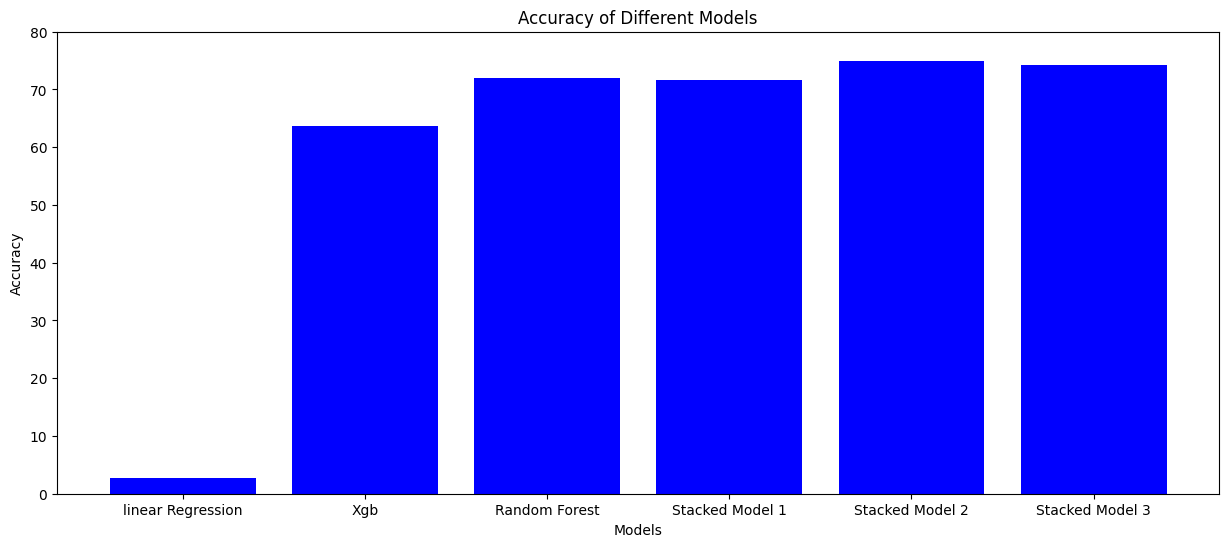

In [165]:

models = ['linear Regression','Xgb','Random Forest', 'Stacked Model 1', 'Stacked Model 2', 'Stacked Model 3']
accuracies = [score1,score3,score4,score5,score6,score7]

# Create a bar chart
plt.figure(figsize=(15, 6))
plt.bar(models, accuracies, color='blue')
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0,80)  
plt.show()
